In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import scipy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

from imblearn.over_sampling import SMOTE

from tabulate import tabulate

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# To be precise I am going to use random values around the mean of the column as substitutes. The range will be from the mean - 1.2 the standard deviation, to the mean + 1.2 the standard deviation.
# This will allow us to avoid an equal value for each datum, but we are not going to skew the distribution of the dataset

for col in ['Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI']:
    mean = df[df[col] != 0][col].mean()
    std = df[df[col] != 0][col].std()

    values = df[col].values 
    
    for i, val in enumerate(values):
        if val == 0:
            values[i] = mean + std * (np.random.rand() * 2 - 1) * 1.2
    df[col] = pd.Series(values).astype(df[col].dtype)


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.765625,72.432292,28.766927,156.584635,32.438387,0.471876,33.240885,0.348958
std,3.369578,30.473615,12.237570,9.548427,103.055488,6.897409,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,79.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,140.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,35.000000,210.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.duplicated().sum()

0

# Viusalizations 

In [9]:
X=df.drop('Outcome', axis=1)
y=df.Outcome

In [10]:
for i, col in enumerate(X.columns):
    print(i,col)

0 Pregnancies
1 Glucose
2 BloodPressure
3 SkinThickness
4 Insulin
5 BMI
6 DiabetesPedigreeFunction
7 Age


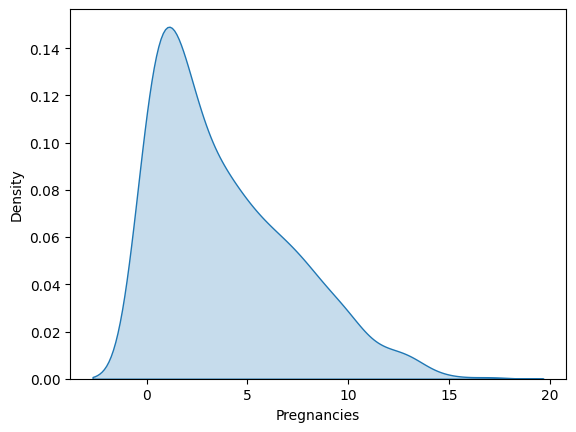

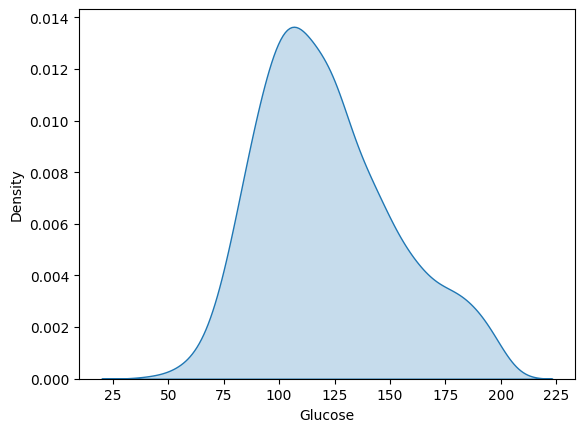

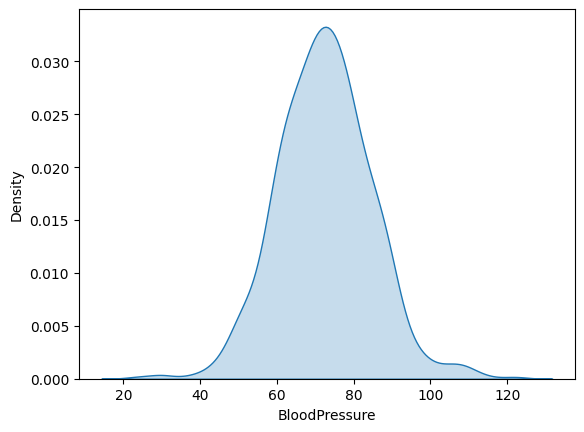

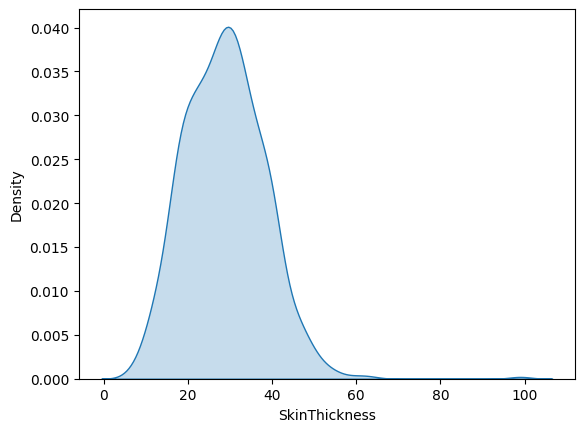

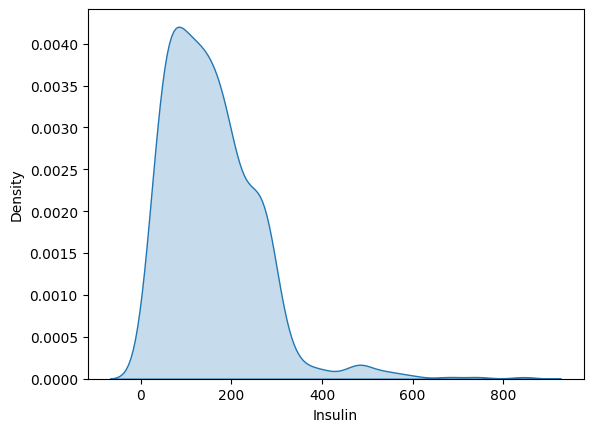

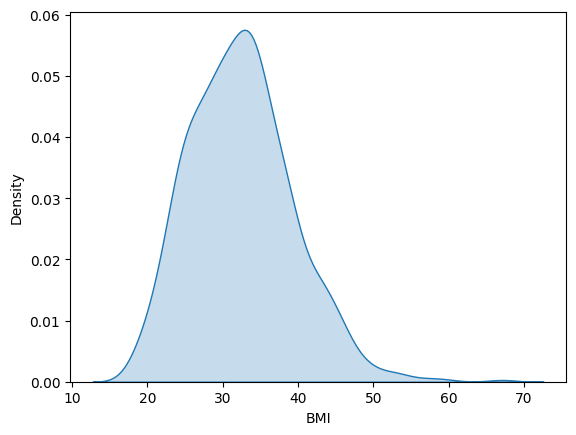

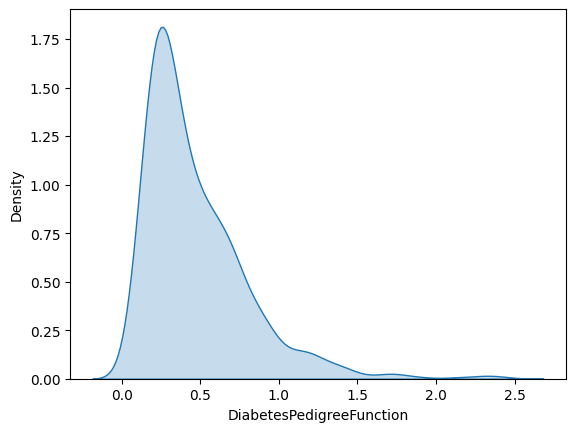

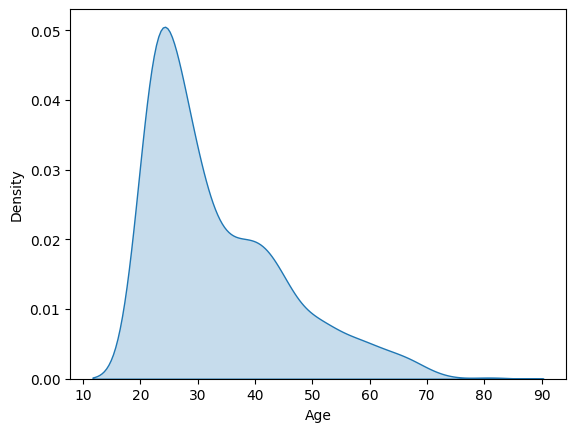

In [11]:
for col in X.columns:
    ax = sns.kdeplot(data=df, x=X[col], fill=True)
    plt.show()

In [12]:
# From that graph we can see:

# "Pregnancies", "Insulin", "DiabetesPedigreeFunction" and "Age" have a right-skewed distribution.
# In contrast, "Glucose," "BloodPressure," "SkinThickness" and "BMI" have a normal distribution.
# We can see that the ages of our patients ranged from just over 10 to even 90 years old, showing a very high range of age

In [13]:
counts = y.value_counts()


In [14]:
px.bar(counts)
   

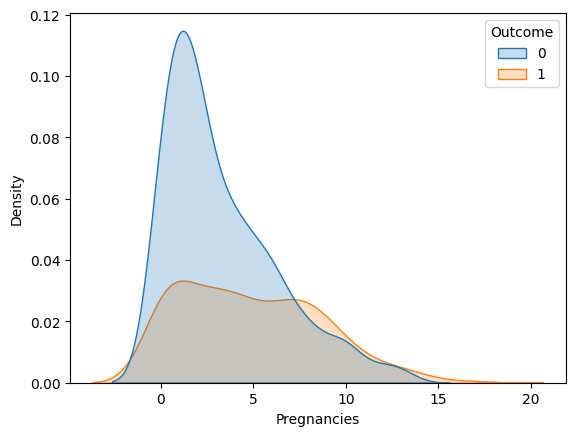

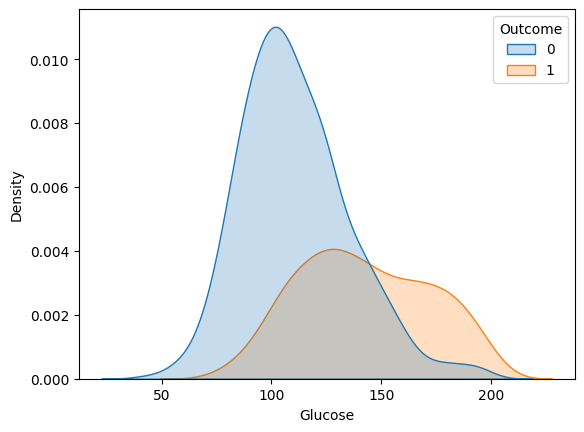

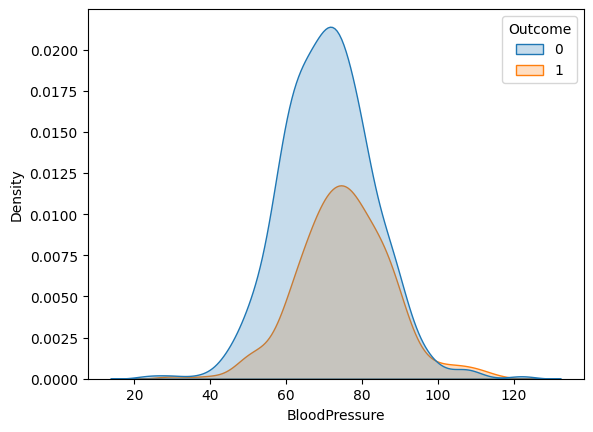

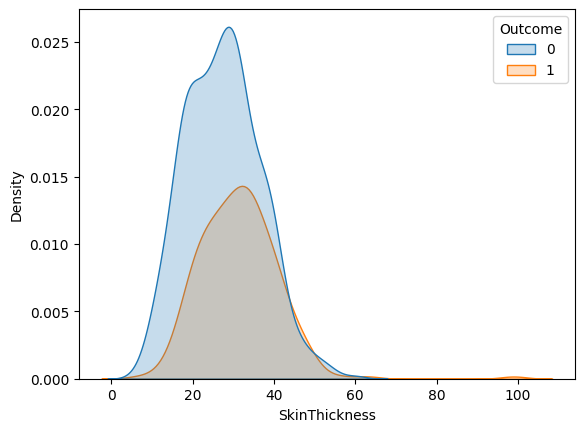

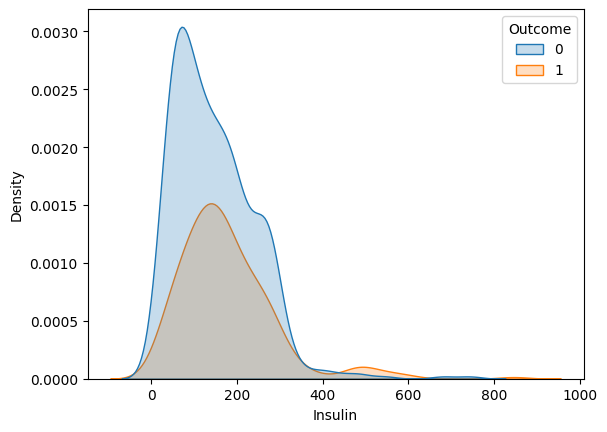

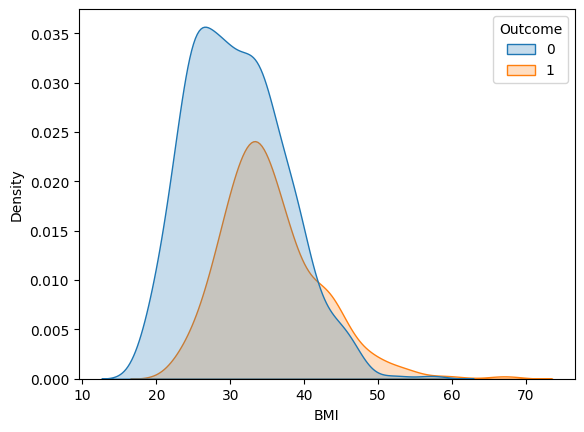

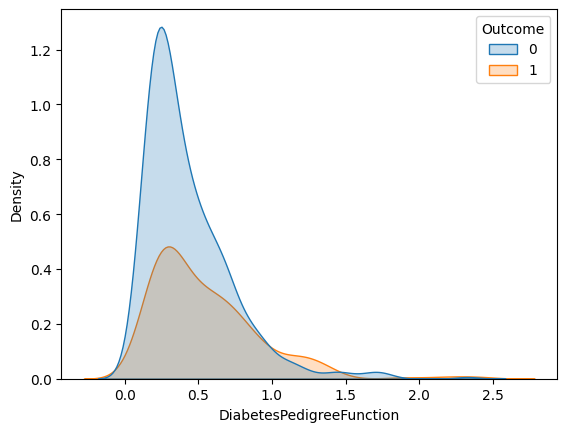

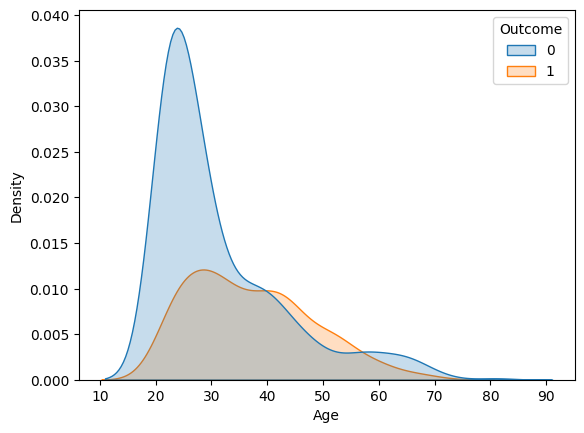

In [15]:
for col in X.columns:
    ax = sns.kdeplot(data=df, x=X[col], hue=y, fill=True)
    plt.show()

In [16]:
# From the graph we note that patients with diagnosed diabetes tend to have higher values for all available features.
# This is especially true for "Glucose" and "BMI,"
# In terms of age, the difference between the two classes is also very high.

# It is also interesting to note that having more pregnancies correlates with a higher likelihood of being diagnosed with diabetes.

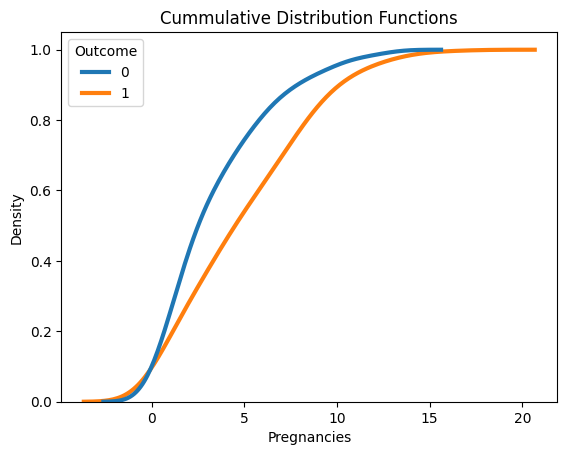

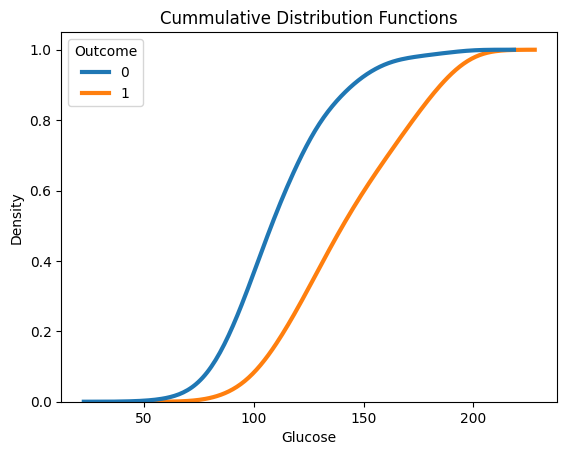

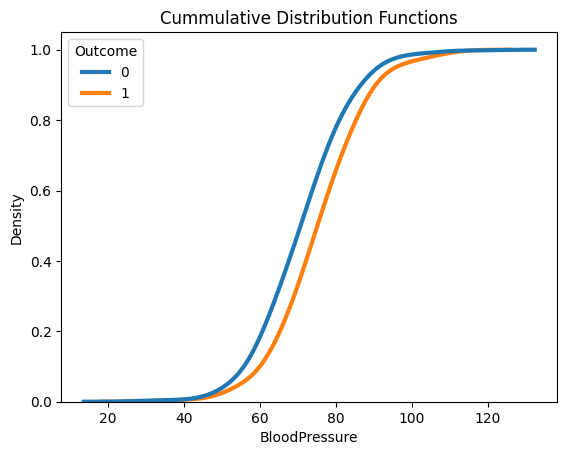

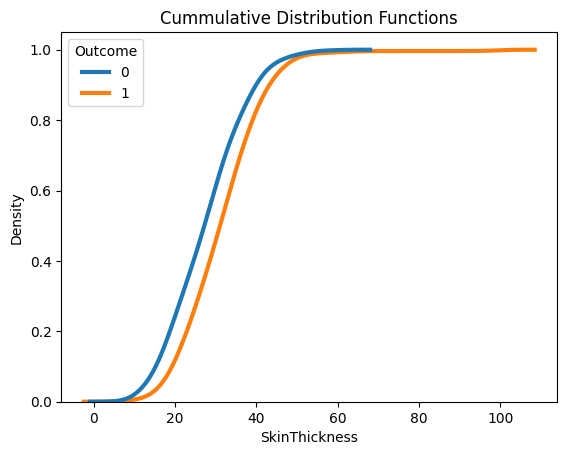

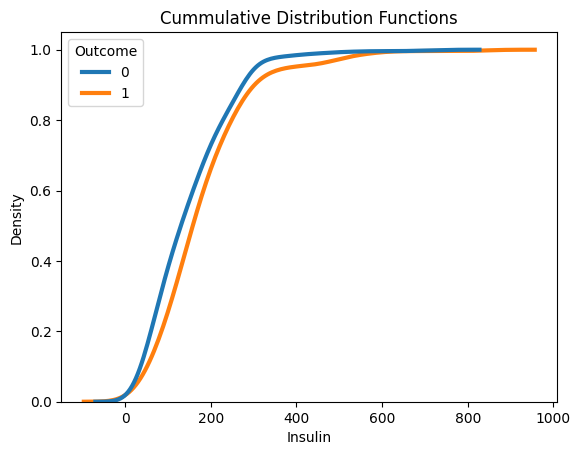

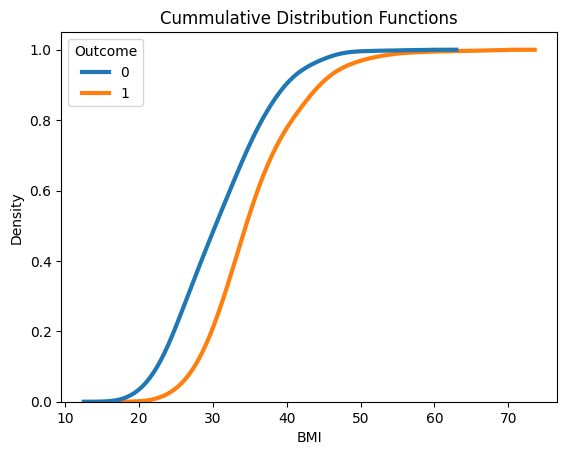

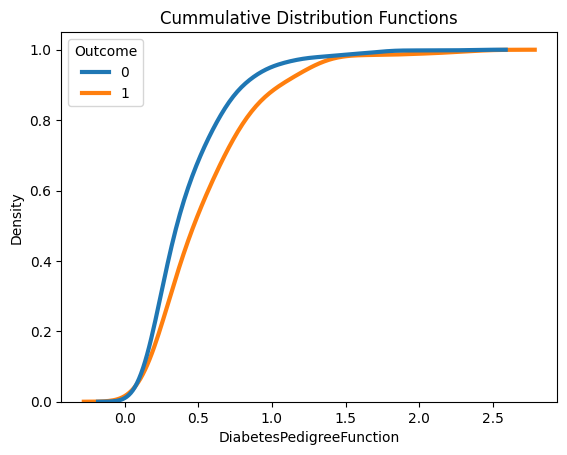

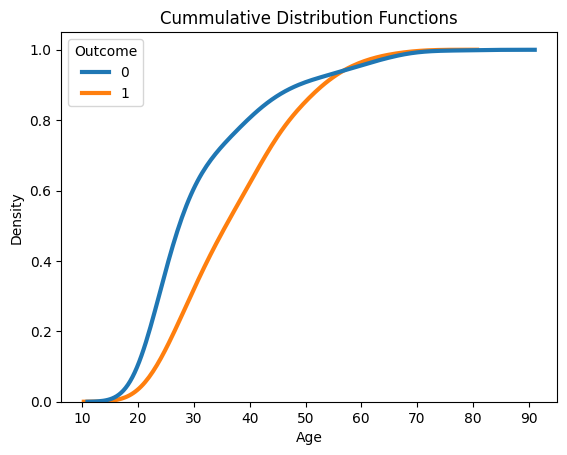

In [17]:
for col in X.columns:     
    sns.kdeplot(data=df, x=col, hue=y, cumulative=True, linewidth=3, common_norm=False)
    plt.title("Cummulative Distribution Functions")
    plt.show()

C:\Users\Michal\AppData\Local\Temp\ipykernel_29300\3720685178.py:3: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



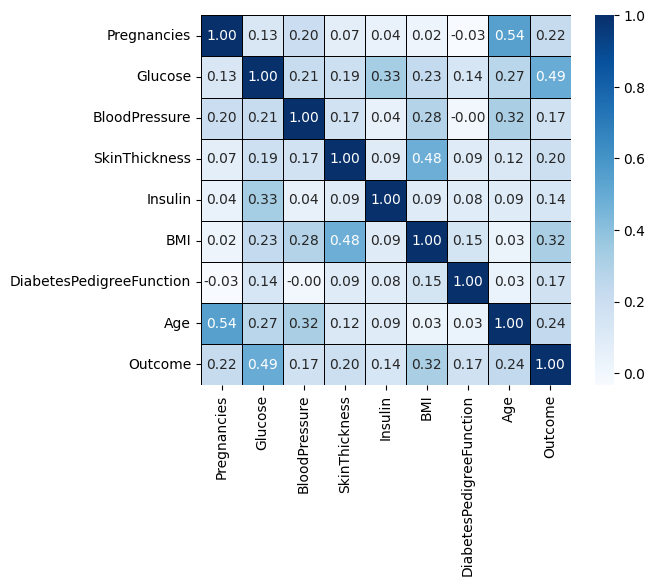

In [18]:
fig,ax = plt.subplots(1)
sns.heatmap(df.corr(), annot=True, cmap="Blues", square=True, linewidth=.5, linecolor="black", fmt=".2f")
fig.show()

In [19]:
# With a value of 0.49, the highest correlation with "Outcome" is with "Glucose." This is followed, as we noted from the previous graphs, by "BMI" and "Age"

# We explored the data in depth and understood how they behave. It is time to look for a model that can make reliable predictions on that dataset.

# Modelling

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

Searching for base model

In [22]:
def classifier_evaluation(y_true, y_predict, y_scores, label="Test"):

    accuracy = accuracy_score(y_true, y_predict)
    precision = precision_score(y_true, y_predict)
    recall  = recall_score(y_true, y_predict)
    f1 = f1_score(y_true, y_predict)
    auc = roc_auc_score(y_true, y_scores)

    header = ["Accuracy", "Precision", "Recall", "F1 Score", "Auc Score"]
    
    data = [accuracy, precision, recall, f1, auc]
    data = [round(el, 2) for el in data]

    table = [header, data]

    if label:
        print(f"{label} scores")

    print(tabulate(table, headers="firstrow", tablefmt="rst"))

def cv_and_evaluate(model, X_train, y_train, X_test, y_test, name=None):

    cv_score = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1)
    
    print(f"{name} CV Results \t Mean: {np.mean(cv_score)} \t Std: {np.std(cv_score)}")
    print(cv_score)

    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    
    try:
        y_test_score = model.predict_proba(X_test)[:, 1]
    except:
        y_test_score = model.decision_function(X_test)

    classifier_evaluation(y_test, y_test_pred, y_test_score)

In [23]:
base = DecisionTreeClassifier(random_state=42, max_depth=3)
adb_clf = AdaBoostClassifier(base, random_state=42, n_estimators=50)
lr = LogisticRegression()
rf = RandomForestClassifier(max_depth=8, random_state=42)
svc = SVC(probability=True, random_state=42)

In [24]:
cv_and_evaluate(adb_clf, X_train, y_train, X_test, y_test, name="AdaBoost")
print('\n')
cv_and_evaluate(lr, X_train_scaled, y_train, X_test_scaled, y_test, name="LogisticRegression")
print('\n')
cv_and_evaluate(rf, X_train, y_train, X_test, y_test, name="Random Forest")
print('\n')
cv_and_evaluate(svc, X_train_scaled, y_train, X_test_scaled, y_test, name="SVC")


AdaBoost CV Results 	 Mean: 0.6839797414367587 	 Std: 0.026183415658129875
[0.68292683 0.66666667 0.72357724 0.69918699 0.64754098]
Test scores
==========  ===========  ========  ==========  ===========
  Accuracy    Precision    Recall    F1 Score    Auc Score
==========  ===========  ========  ==========  ===========
      0.76         0.65      0.73        0.68         0.82
==========  ===========  ========  ==========  ===========


LogisticRegression CV Results 	 Mean: 0.7605757696921231 	 Std: 0.03242739895199697
[0.74796748 0.82113821 0.72357724 0.75609756 0.75409836]
Test scores
==========  ===========  ========  ==========  ===========
  Accuracy    Precision    Recall    F1 Score    Auc Score
==========  ===========  ========  ==========  ===========
      0.75         0.67      0.62        0.64         0.82
==========  ===========  ========  ==========  ===========


Random Forest CV Results 	 Mean: 0.7671598027455684 	 Std: 0.03476427391182687
[0.73170732 0.81300813 0.75609

In [30]:
#Random Forest Highest AUC Score

In [31]:
model = adb_clf

In [32]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
    'base_estimator__max_depth': [1, 2, 3, 4, 5],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4],
    'base_estimator__max_features': ['auto', 'sqrt', 'log2', None]
}

In [33]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

c:\Users\Michal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


9000 fits failed out of a total of 36000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2984 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Michal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Michal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Michal\AppData\Local\Programs\Python\Python39\lib\site

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                                           random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'base_estimator__max_features': ['auto', 'sqrt',
                                                          'log2', None],
                         'base_estimator__min_samples_leaf': [1, 2, 4],
                         'base_estimator__min_samples_split': [2, 5, 10],
                         'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [34]:
print(grid_search.best_params_)

{'algorithm': 'SAMME', 'base_estimator__max_depth': 1, 'base_estimator__max_features': 'log2', 'base_estimator__min_samples_leaf': 4, 'base_estimator__min_samples_split': 2, 'learning_rate': 0.5, 'n_estimators': 100}


In [35]:
best_adboost = grid_search.best_estimator_
cv_and_evaluate(best_adboost, X_train_scaled, y_train, X_test_scaled, y_test, name="Best Random Forest Model")

Best Random Forest Model CV Results 	 Mean: 0.7850593096094897 	 Std: 0.03126573179349484
[0.75609756 0.82926829 0.7804878  0.74796748 0.81147541]
Test scores
==========  ===========  ========  ==========  ===========
  Accuracy    Precision    Recall    F1 Score    Auc Score
==========  ===========  ========  ==========  ===========
      0.79         0.72      0.65        0.69         0.82
==========  ===========  ========  ==========  ===========
